# Introduction to the project

In [102]:
# importing packages & modules

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [103]:
try:
    df_train = pd.read_parquet("/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet")
except FileNotFoundError:
    df_train = pd.read_parquet('/Users/midle/icecube-neutrinos-in-deep-ice/train_meta.parquet')

df_train

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117
...,...,...,...,...,...,...
131953919,660,2147483597,24339210,24339349,5.895612,0.333071
131953920,660,2147483603,24339350,24339383,3.273695,1.503301
131953921,660,2147483617,24339384,24339424,2.945376,1.723253
131953922,660,2147483626,24339425,24339499,1.616582,1.937025


In [104]:
try:
    df_test = pd.read_parquet("/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet")
except FileNotFoundError:
    df_test = pd.read_parquet('/Users/midle/icecube-neutrinos-in-deep-ice/test_meta.parquet')

df_test

,batch_id,event_id,first_pulse_index,last_pulse_index
0,661,2092,0,298
1,661,7344,299,334
2,661,9482,335,377


According to the shown data, the 'batch_id' shows the number of the batch where the event was placed into. All of them are in a separate catalogue 'batch' (as a part of Exploratory Data Analysis only the batch #1 will be taken) in separate files. 'event_id' refers to the event in a specific batch with the information regarding the id of the sensor, time, charge and auxiliary - all of these arguments are in each of the batch files.

The difference between last_pulse_index and first_pulse_index indicate the amount of pulses under each event. 

In [105]:
batch_1 = pd.read_parquet('/Users/midle/icecube-neutrinos-in-deep-ice/train/batch_1.parquet').reset_index()
batch_1

,event_id,sensor_id,time,charge,auxiliary
0,24,3918,5928,1.325,True
1,24,4157,6115,1.175,True
2,24,3520,6492,0.925,True
3,24,5041,6665,0.225,True
4,24,2948,8054,1.575,True
...,...,...,...,...,...
32792411,3266196,1961,17617,0.975,True
32792412,3266196,36,17705,0.625,True
32792413,3266196,356,18192,0.725,True
32792414,3266196,2826,18609,0.575,True


Sensor geometry connected by sensor_id column with the batch is to be downloaded as well

In [106]:
sensor = pd.read_csv('/Users/midle/icecube-neutrinos-in-deep-ice/sensor_geometry.csv')
sensor

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95
...,...,...,...,...
5155,5155,-10.97,6.72,-472.39
5156,5156,-10.97,6.72,-479.39
5157,5157,-10.97,6.72,-486.40
5158,5158,-10.97,6.72,-493.41


Merging batch_1 and sensor variables to see to have sensor_id and x, y, z in one DataFrame to plot it easily.

In [107]:
batch_sensor = batch_1.merge(sensor, how='left', on='sensor_id')
batch_sensor

,event_id,sensor_id,time,charge,auxiliary,x,y,z
0,24,3918,5928,1.325,True,303.41,335.64,206.58
1,24,4157,6115,1.175,True,-145.45,374.24,212.73
2,24,3520,6492,0.925,True,505.27,257.88,-174.60
3,24,5041,6665,0.225,True,-9.68,-79.50,181.00
4,24,2948,8054,1.575,True,576.37,170.92,357.88
...,...,...,...,...,...,...,...,...
32792411,3266196,1961,17617,0.975,True,-324.39,-93.43,-197.72
32792412,3266196,36,17705,0.625,True,-256.14,-521.08,-116.72
32792413,3266196,356,18192,0.725,True,361.00,-422.83,-453.65
32792414,3266196,2826,18609,0.575,True,330.03,127.20,398.74


Let's check for missing values and duplicated objects

In [113]:
print("Number of duplicates in each of these files:")
print("\tdf_train:", df_train.duplicated().sum())
print("\tdf_test:", df_test.duplicated().sum())
print("\tbatch_1:", batch_1.duplicated().sum())
print("\tsensor:", sensor.duplicated().sum())

Number of duplicates in each of the files:
	df_train: 0
	df_test: 0
	batch_1: 301
	sensor: 0


As the number of duplicates in 'batch_1' dataset is extremely small relatively to the size of the dataset, the duplicates can be removed from 'batch_1' variable.

In [117]:
batch_1 = batch_1[~batch_1.duplicated()]

In [120]:
print("Number of missing values in each of these files:")
print("\ndf_train:", df_train.isna().sum())
print("\ndf_test:", df_test.isna().sum())
print("\nbatch_1:", batch_1.isna().sum())
print("\nsensor:", sensor.isna().sum())

print("\nLuckily, there aren't any missing values in any of the explored files.")

Number of missing values in each of these files:

df_train: batch_id             0
event_id             0
first_pulse_index    0
last_pulse_index     0
azimuth              0
zenith               0
dtype: int64

df_test: batch_id             0
event_id             0
first_pulse_index    0
last_pulse_index     0
dtype: int64

batch_1: event_id     0
sensor_id    0
time         0
charge       0
auxiliary    0
dtype: int64

sensor: sensor_id    0
x            0
y            0
z            0
dtype: int64
There aren't any missing values in any of the explored files.


# Переделать графике ниже, поскольку он не отображает прямую с помощью azimuth & zenith

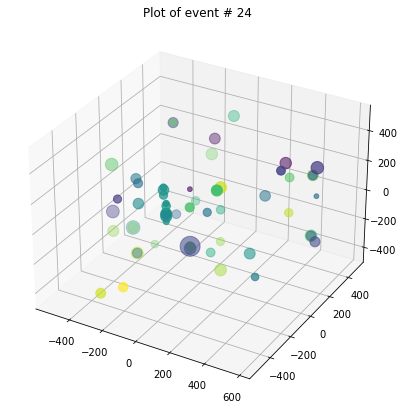

In [109]:
# Plot of a single event (event_id = 24):

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

x = batch_sensor[batch_sensor['event_id'] == 24]['x']
y = batch_sensor[batch_sensor['event_id'] == 24]['y']
z = batch_sensor[batch_sensor['event_id'] == 24]['z']

time = batch_sensor[batch_sensor['event_id'] == 24]['time']

# Charge multiplied by 100 to get larger dots
charge = batch_sensor[batch_sensor['event_id'] == 24]['charge'] * 100

ax.scatter3D(x, y, z, c=time, s=charge)
plt.title('Plot of event # 24')
plt.show()